<img src="Cancer-Cells.JPG" alt="view" width=400>

# <div align="center">Wisconsin Breast Cancer data set

### *Abstract*
------
In this project, We build a model to predict whether the cancer is *malignant* or *benign* through features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. We compare and explore various
prediction methods. Our result exhibit that our approach of the issue need
to be successful, and has the ability to process predictions that
would be comparative with other Diagnostic models. 
We use DecisionTrees model to predict our classifier and on further steps we analyse the model with SVM as well in order to get more precision execution. 
We in that point recommend a model which support best Diagnostic for a person. 


### *Objective*
-----
The objective of this project is to build a model to forecast whether the cancer is diagonosed in a body is *malignant* or *benign*.
###### Dataset to downloaded from the below link
[https://www.kaggle.com/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)


### *Motivation for The Case Study*
------
Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

### All the Lifecycle In A Data Science Projects
------
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('data\\data.csv')
## print shape of dataset with rows and columns
print(dataset.shape)

(569, 33)


In [3]:
## print the top5 records
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Mean and standard deviation of all features look nice enought to proceed.

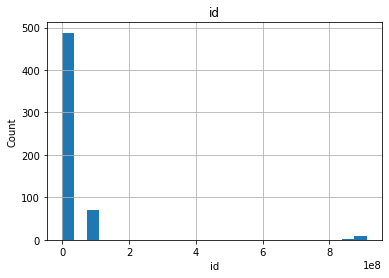

<Figure size 2.88x4.32 with 0 Axes>

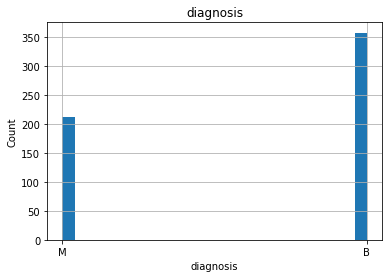

<Figure size 2.88x4.32 with 0 Axes>

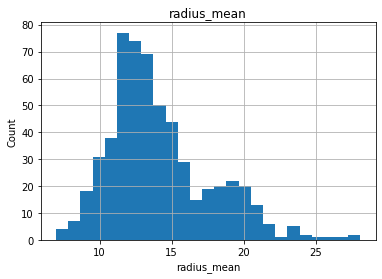

<Figure size 2.88x4.32 with 0 Axes>

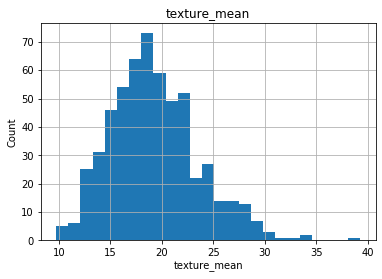

<Figure size 2.88x4.32 with 0 Axes>

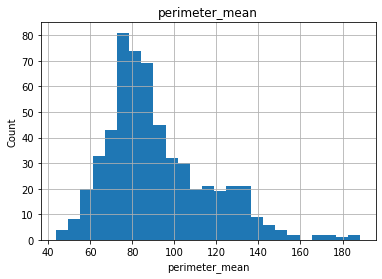

<Figure size 2.88x4.32 with 0 Axes>

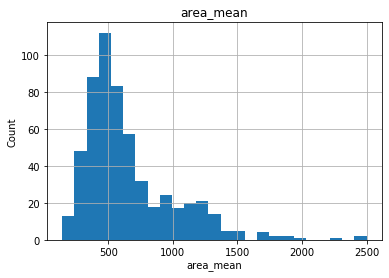

<Figure size 2.88x4.32 with 0 Axes>

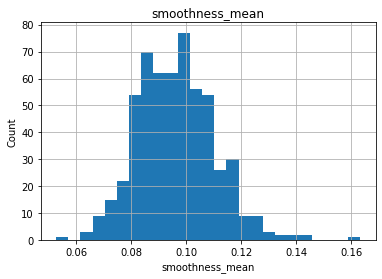

<Figure size 2.88x4.32 with 0 Axes>

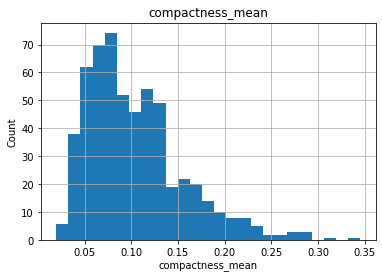

<Figure size 2.88x4.32 with 0 Axes>

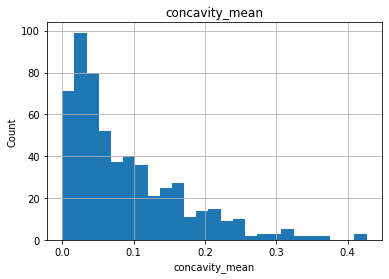

<Figure size 2.88x4.32 with 0 Axes>

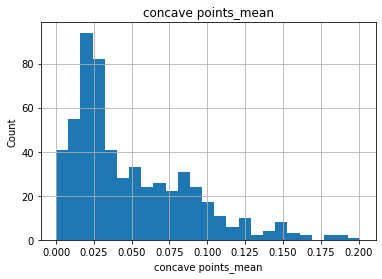

<Figure size 2.88x4.32 with 0 Axes>

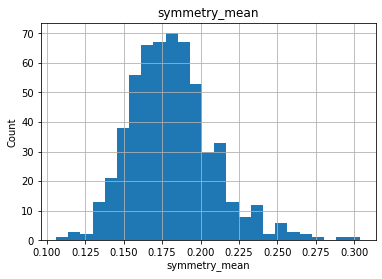

<Figure size 2.88x4.32 with 0 Axes>

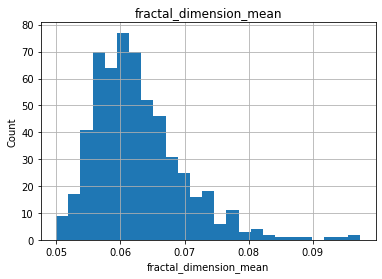

<Figure size 2.88x4.32 with 0 Axes>

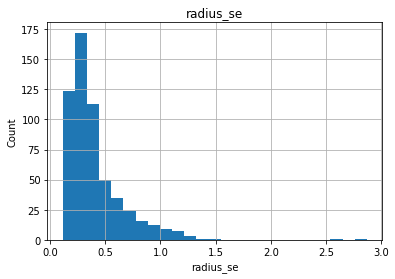

<Figure size 2.88x4.32 with 0 Axes>

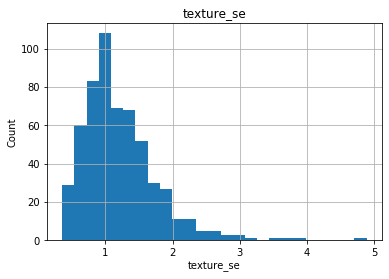

<Figure size 2.88x4.32 with 0 Axes>

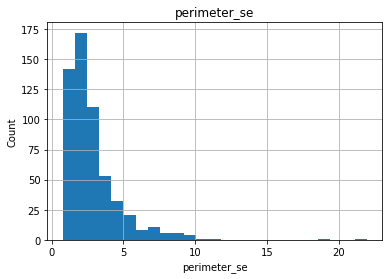

<Figure size 2.88x4.32 with 0 Axes>

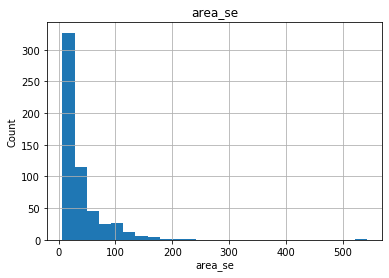

<Figure size 2.88x4.32 with 0 Axes>

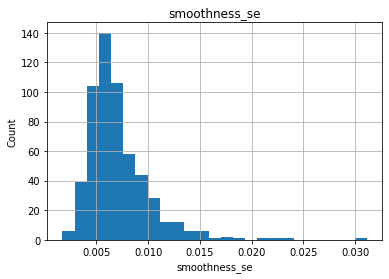

<Figure size 2.88x4.32 with 0 Axes>

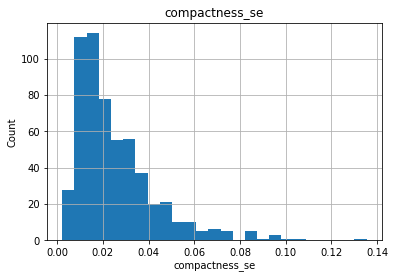

<Figure size 2.88x4.32 with 0 Axes>

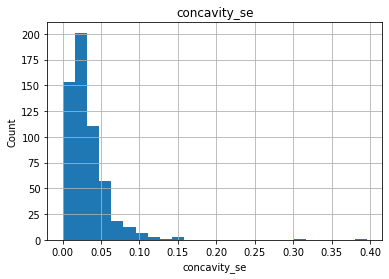

<Figure size 2.88x4.32 with 0 Axes>

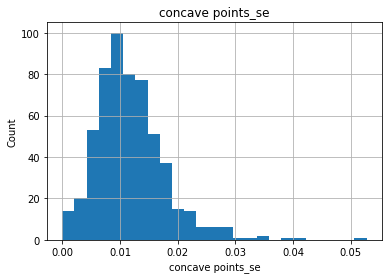

<Figure size 2.88x4.32 with 0 Axes>

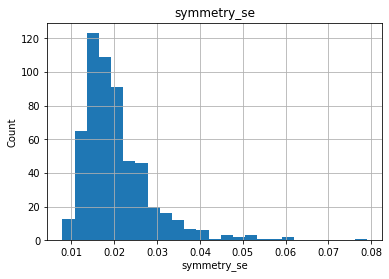

<Figure size 2.88x4.32 with 0 Axes>

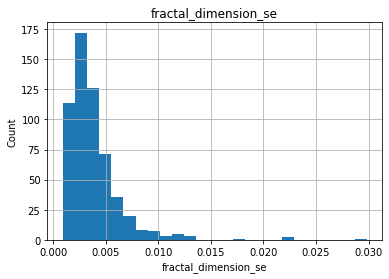

<Figure size 2.88x4.32 with 0 Axes>

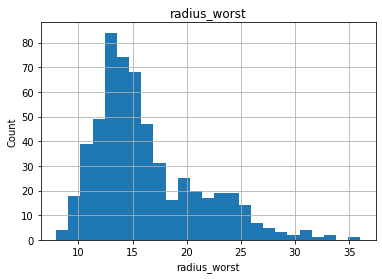

<Figure size 2.88x4.32 with 0 Axes>

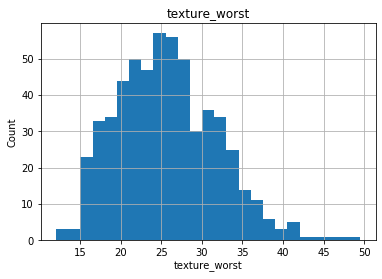

<Figure size 2.88x4.32 with 0 Axes>

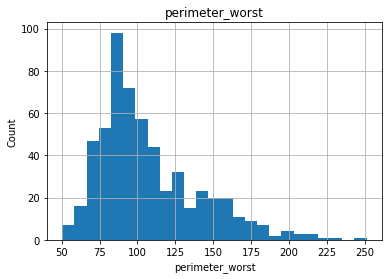

<Figure size 2.88x4.32 with 0 Axes>

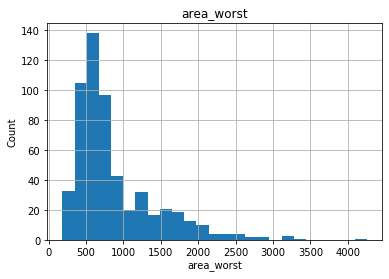

<Figure size 2.88x4.32 with 0 Axes>

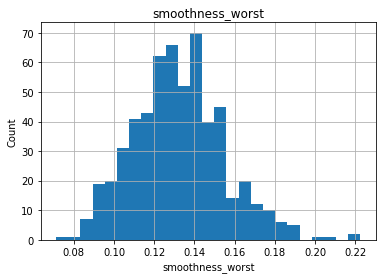

<Figure size 2.88x4.32 with 0 Axes>

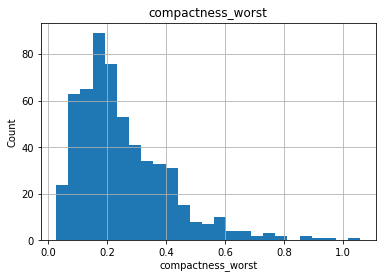

<Figure size 2.88x4.32 with 0 Axes>

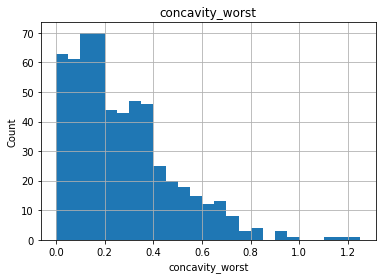

<Figure size 2.88x4.32 with 0 Axes>

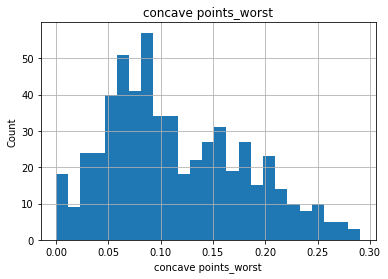

<Figure size 2.88x4.32 with 0 Axes>

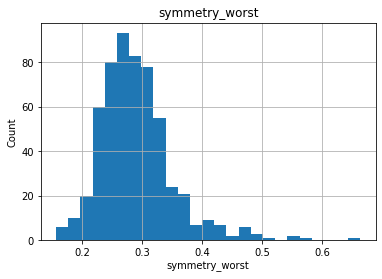

<Figure size 2.88x4.32 with 0 Axes>

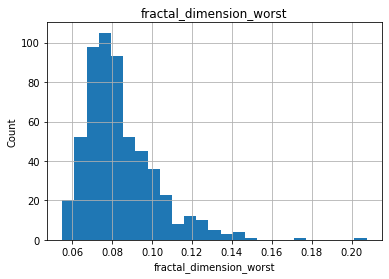

<Figure size 2.88x4.32 with 0 Axes>

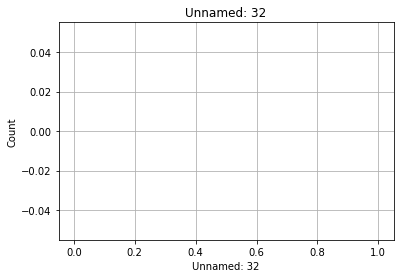

<Figure size 2.88x4.32 with 0 Axes>

In [6]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in dataset:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(0.04,0.06))
    plt.show()

#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature

In [7]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature ,"  ", np.round(dataset[feature].isnull().mean(), 4),  '% missing values')


Unnamed: 32    1.0 % missing values


**Since there are not many missing values, we do not need to find any relationship between missing values and other terms.**



---
**As per ques 1.2 we have to distribute the plot using 2 distribution one for each class**
---
1. Here is a bar plot for a single distribution is categorical data(not useful for us). 
2. Below we have a distplot for each particular class(kde flag is not false) 

In [8]:
"""
def bar_chart(feature):
    malignant=dataset[dataset['diagnosis']=='M'][feature].value_counts()
    benign=dataset[dataset['diagnosis']=='B'][feature].value_counts()
    df=pd.DataFrame([malignant,benign])
    df.index = ['malignant','benign']
    df.plot(kind='bar')
#bar_chart('radius_mean')

"""

"\ndef bar_chart(feature):\n    malignant=dataset[dataset['diagnosis']=='M'][feature].value_counts()\n    benign=dataset[dataset['diagnosis']=='B'][feature].value_counts()\n    df=pd.DataFrame([malignant,benign])\n    df.index = ['malignant','benign']\n    df.plot(kind='bar')\n#bar_chart('radius_mean')\n\n"

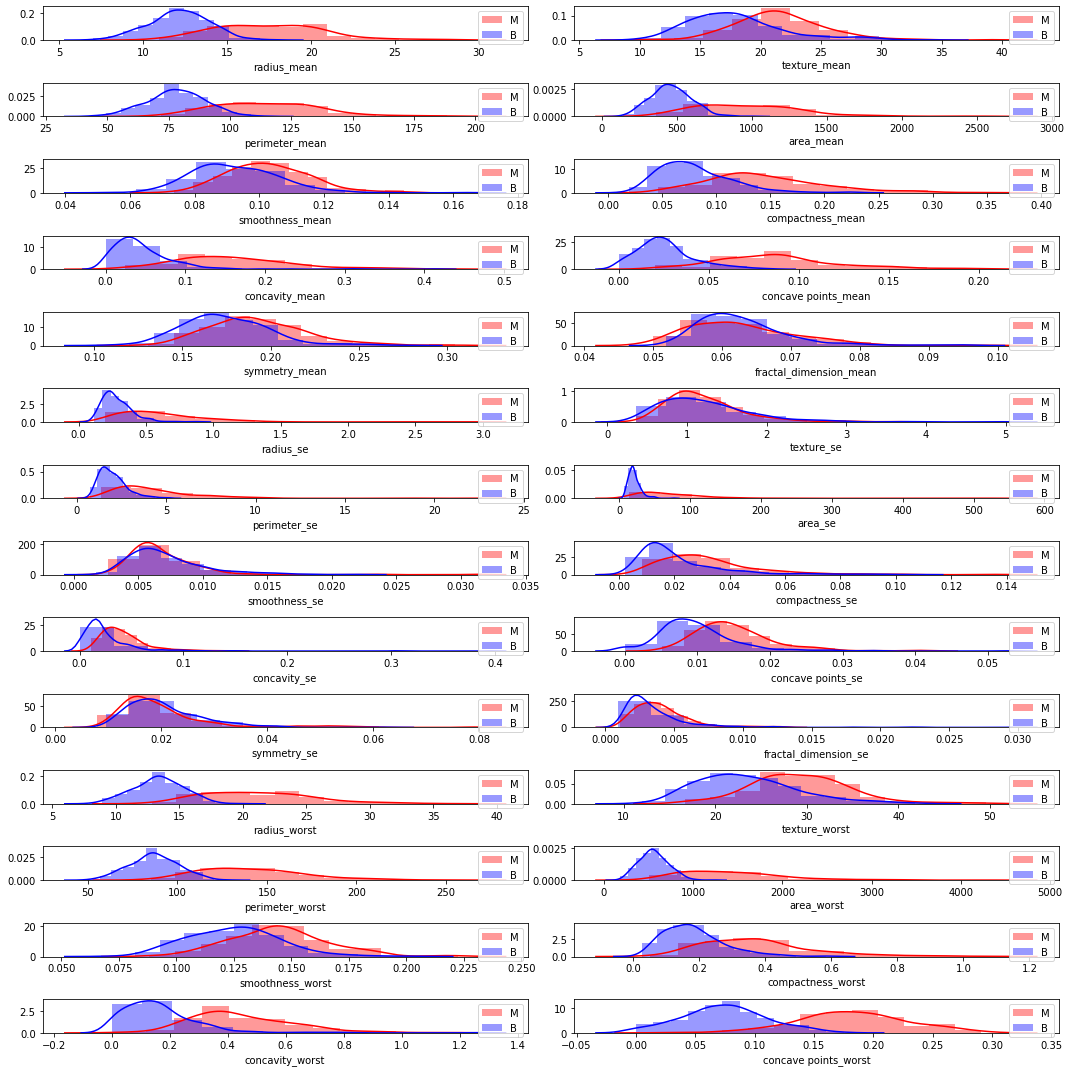

In [11]:
features_mean= list(dataset.columns[1:29])
features_mean
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(dataset[dataset['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(dataset[dataset['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


---
#### Drop unrequired values
From the above dataset some of the features like Id and Unnamed:32 is not required

In [10]:
dataset.drop(['id','Unnamed: 32'], axis=1,inplace=True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
### Categorical Variables

In [12]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['diagnosis']

In [13]:
dataset[categorical_features].head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is diagnosis and number of categories are 2


In [16]:
dataset['diagnosis']=pd.get_dummies(dataset['diagnosis'],drop_first=True)

In [442]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
### Numerical Features

In [18]:
Y = dataset['diagnosis']
dataset.drop(['diagnosis'], axis=1,inplace=True)
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X = dataset.copy()
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Relation between numerical variables

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

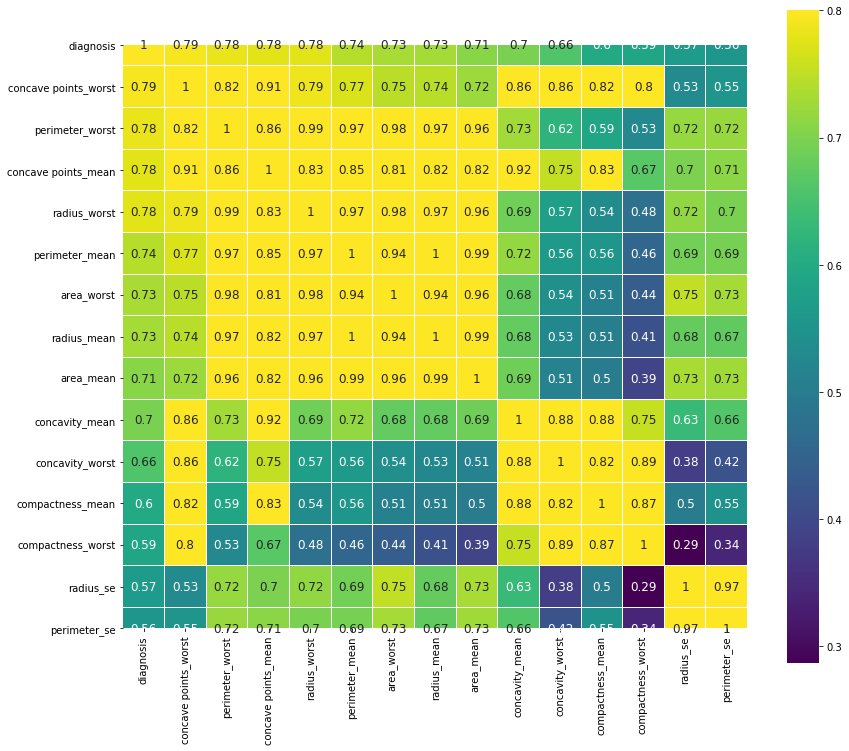

In [17]:
## Note*= To put this heat map in Numerical variable order we run the intial dataset and act accordingly.
## We draw a heatmap for top 15 features and correlation of each features with respect to diagnosis is mentioned.

num_data=dataset.select_dtypes(exclude=[object])
correlation=num_data.corr()
print(correlation['diagnosis'].sort_values(ascending=False))  #Arranging every other function w.r.t to Salesprice
#heat map
k=15       #top highly corelated features
cols=correlation.nlargest(k,'diagnosis')['diagnosis'].index
print(cols)
cm=np.corrcoef(dataset[cols].values.T)
f , ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", xticklabels=cols.values , annot_kws={'size':12}, yticklabels=cols.values)

#### As we can see some features are highly correlated but droping these features reduce accuracy(tested). So, we are not dropping anything from this dataset.

---
#### Splitting the dataset

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

---
### Feature Scaling and Modeling
We need to bring all features to the same level of magnitudes within a specific scale.

In [21]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[76, 14],
       [ 3, 50]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision=precision_score(Y_test, Y_pred)
print('Precision: %f' % precision)
from sklearn.metrics import recall_score
recall=recall_score(Y_test, Y_pred)
print('Recall: %f' % recall)                    
from sklearn.metrics import f1_score
F1=f1_score(Y_test, Y_pred)
print('F1 score: %f' % F1)

Accuracy: 0.881119
Precision: 0.781250
Recall: 0.943396
F1 score: 0.854701


##### Decision tree classifier using hyper parameters

In [25]:
from sklearn.model_selection import learning_curve,GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': [3,2,1,None],
    'min_samples_leaf': range(1, 10, 10),
    'min_samples_split': range(2, 10, 10),
    'criterion': ["entropy", "gini"],
    'random_state' : [0,None],
    'presort' : ['auto', True, False]
    
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 2, 1, None],
                         

In [26]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9272300469483568
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='auto',
                       random_state=None, splitter='best')


**As we can see Grid_search_CV has an accuracy of 93%**

In [27]:
classifier_HP =  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')
classifier_HP.fit(X_train, Y_train)
Y_pred_HP = classifier_HP.predict(X_test)

In [28]:
cm_HP = confusion_matrix(Y_test, Y_pred_HP)
cm_HP_pd=pd.DataFrame(cm_HP,index=["positive","Negative"],columns=["positive","Negative"])
cm_HP_pd

,positive,Negative
positive,84,6
Negative,1,52


In [29]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred_HP)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision=precision_score(Y_test, Y_pred_HP)
print('Precision: %f' % precision)
from sklearn.metrics import recall_score
recall=recall_score(Y_test, Y_pred_HP)
print('Recall: %f' % recall)                    
from sklearn.metrics import f1_score
F1=f1_score(Y_test, Y_pred_HP)
print('F1 score: %f' % F1)

Accuracy: 0.951049
Precision: 0.896552
Recall: 0.981132
F1 score: 0.936937


**Using Hyperparameters increase the accuracy**

#### Strengths and Weaknesses of our classifier

Once we built a classification model, we need to evaluate how good the predictions made by that model will be and for that we have some performance metrics which help us to determine our model accuracy.
We have a Confusion Matrix for our classification problem which predicts whether cancer diagnosis.

*note:- Some important term regarding confusion matrix are :-
1. TP= True Positive (the number of time our model predict positive and it is actually positive)
2. FP= False Positive (the number of time our model predict positive but it is Negative)
3. TN= True Negative (the number of time our model predict Negative and it is Negative)
4. FN= False Negative (the number of time our model predict Negative but it is positive)

<img src="cm.PNG" alt="confussion matrix" width=200>


Considering above mentioned terms
~Accuracy = (TP+TN) / (TP+FP+TN+FN).

It is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

Accuracy is a good evaluation matrix until FN and FP does't have an outrageous outcomes like in our case if our Accuracy matrix is 95% accurate even then 5% will be a huge number to get false positive and false negative and this will be life threatening. In such cases we use F1-Score matrix to get more accurate results.

F1-Score=This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

Lets discuss Precision and Recall before jumping to F1-Score
~Precision = It is implied as the measure of the correctly identified positive cases from all the predicted positive cases.
Precision = TP / (TP+FP)
It is useful when the costs of False Positives is high.

~Recall = It is the measure of the correctly identified positive cases from all the actual positive cases.
Recall = TP / (TP+FN)
It is important when the cost of False Negatives is high.

~ F1-Score = 2* (Precision*Recall) / (Precision+Recall)

As concluded from the above text, We can see there is a room for improvement in our classifier.

###### **Strength**
As we can see in our confusion matrix the **False Negative** value is very small. There is rarely a chance that a person is Positive and our classifier predict him negative.

---
#### Plotting ROC curve

For plotting AUCROC curve we use **predict_proba** function because we have 30 features in our X_train and we have to convert it into size of class (2 in our case).

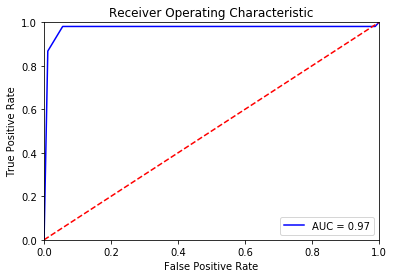

<Figure size 576x432 with 0 Axes>

In [30]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_HP.predict_proba(X_test)    #Probability estimates in multi_class problem
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(8,6))
plt.show()

---
## Plotting the Decision Tree

In [31]:
# Putting features
features = list(dataset.columns[:])

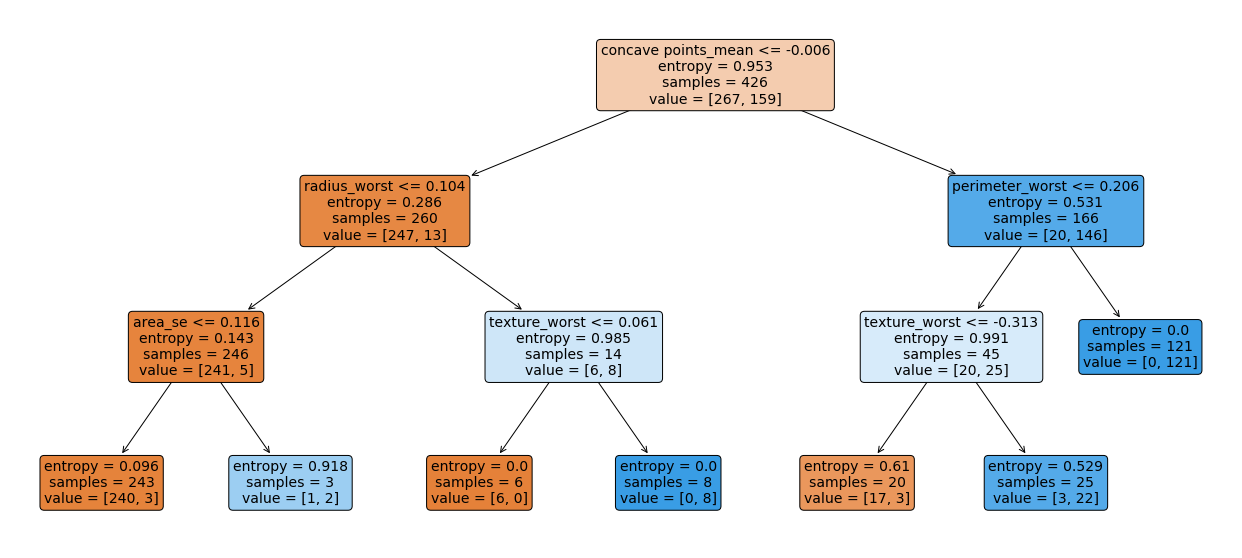

In [32]:
## Displaying decision tree using plot_tree()
from sklearn.tree import plot_tree
plt.figure(figsize=(22,10))
a = plot_tree(classifier_HP, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)

A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

<img src="descision_tree.jpg" alt="Tree stucture" width=200>

1. **What do each of the entries in the first node mean?** 

As mentioned above 1st node is root node. We will start splitting our tree through root node parameters. 
"Concave points_mean" = It is a feature in our dataset which represent mean for number of concave portions of the contour. There is a criterion mention there concave points_mean <= -0.006. 
We will further split according these criterions. When concave points_mean criterion is fulfilled then we will look for other criterions like entropy.

2. **Are the features in the decision tree matching the initial candidate features from Section 1?**

Yes it is matching matching only the features we dropped are not there. We can verify that with the variable **feature_importances.shape**. Where feature_importances is a dataframe

---
## Decision Boundary

##### For Describing decision boundry with 2 features we need to use PCA.

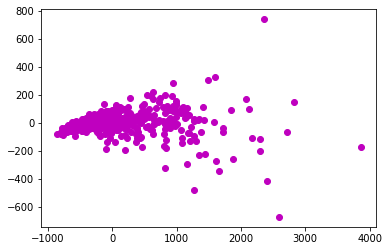

<Figure size 4.32x5.76 with 0 Axes>

In [39]:
from sklearn.decomposition import PCA
coords = PCA(n_components=2).fit_transform(dataset)  
plt.scatter(coords[:, 0], coords[:, 1], c='m')   #Plotting every row w.r.t column 0 and 1
plt.figure(figsize=(0.06,0.08))
plt.show()

In [34]:
PCA_Df = pd.DataFrame(data = coords
             , columns = ['principal component 1', 'principal component 2'])
print(PCA_Df.shape)
PCA_Df.head()

(569, 2)


,principal component 1,principal component 2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


---
### Trying to Plot PCA with all scaled data

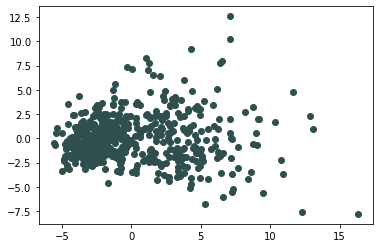

<Figure size 4.32x5.76 with 0 Axes>

In [35]:
scaler1 = StandardScaler()
scaler1.fit(dataset)
feature_scaled = scaler1.transform(dataset)
coords = PCA(n_components=2).fit_transform(feature_scaled)  
plt.scatter(coords[:, 0], coords[:, 1], c='darkslategray')   #Plotting every row w.r.t column 0 and 1
plt.figure(figsize=(0.06,0.08))
plt.show()

**Points are very much scattered we will go with the above one**

---

**As we know it well that there are only 2 clusters "M" and "B" still we use elbow method to cross check**

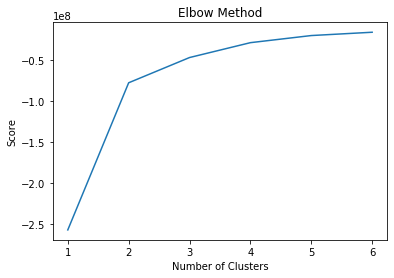

<Figure size 4.32x5.76 with 0 Axes>

In [36]:
from sklearn.cluster import KMeans
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.figure(figsize=(0.06,0.08))
plt.show()

**As we can see from elbow method that best K value is 2.**

### Graph to define Clusters

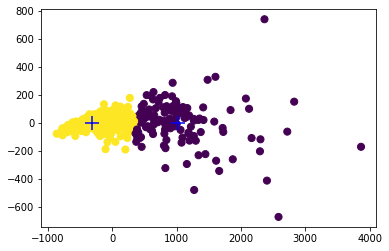

In [40]:
Y_sklearn = coords
n_clusters = 2
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=10)
labels = clf.fit_predict(Y_sklearn)  #Compute cluster centers and predict cluster index for each sample.
pred = clf.predict(Y_sklearn)  #Predict the closest cluster each sample in X belongs to.
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=pred, s=50, cmap='viridis')
plt.scatter(1.02482043e+03, 1.58741196e+00 , s=200, c="b", marker="+")
plt.scatter(-3.06510219e+02, -4.74773896e-01, s=200, c="b", marker="+")
plt.show()

In [41]:
Analysis_point=clf.cluster_centers_
Analysis_point

array([[ 1.02482043e+03,  1.58741196e+00],
       [-3.06510219e+02, -4.74773896e-01]])

**Pointed Green dots are centroid of each cluster**

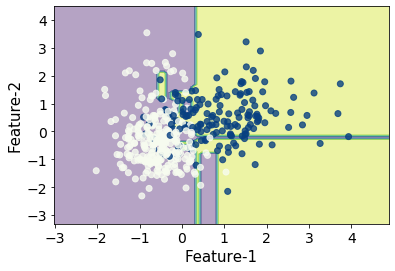

In [42]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8,cmap='GnBu')
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

plot_decision_boundaries(X_train, Y_train, DecisionTreeClassifier )
plt.show()

### Selecting the five most important features from the decision tree attribute 

In [43]:
feature_importances = pd.DataFrame(classifier_HP.feature_importances_,
                                   index = dataset.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [479]:
feature_importances.head()

,importance
concave points_mean,0.686735
perimeter_worst,0.122714
texture_worst,0.092972
radius_worst,0.071722
area_se,0.025857


In [44]:
feature_importances.shape

(30, 1)

In [45]:
top_disp=feature_importances.iloc[0:5]

In [46]:
top_disp

,importance
concave points_mean,0.686735
perimeter_worst,0.122714
texture_worst,0.092972
radius_worst,0.071722
area_se,0.025857


---
Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern?
---
*Classes*: When we are performing classification, the list of different groups that the data can belong to are known as the classes.
**Decision trees Concept**
Decision trees try and split the dataset in such a manner that the data present within each group is as similar to each other as possible while the data present in one group is as different from the data present in the other groups as possible. In order to achieve this, we use the concepts of **Entropy** and **Information Gain**.
The most widely used algorithm when actually constructing decision trees is known as ID3. The ID3 algorithm makes use of above mentioned two concepts ‘entropy’ and ‘information gain’ to design the decision tree.
**Entropy**: Usually, the term ‘entropy’ is used to refer to a measure of disorder in a given system. With decision trees, entropy can be understood as a measure of the homogeneity of a sample of a group of data. Usually, entropy is calculated on a scale of 0 to 1. An entropy of 0 indicates that the data has minimal disorder (it is very homogeneous/pure), whereas an entropy of 1 (or a high value of entropy) indicates that there is a lot of disorder in the data.
The formula for calculating Entropy is:
<img src="entropy.PNG" alt="Formula" width=400>
Where ’n’ is the number of classes and pi is the probability of a data point in our group belonging to the class ‘i’.

The lower the entropy, the closer we are getting to forming groups with unique data points, i.e. as the entropy reduces, we are getting closer to being able to successfully classify our data when entropy value of 0 is what is considered to be a leaf (it has data points belonging to only one class).

**Information Gain**: Information Gain is used to ensure that our entropy is reducing. Thus, information gain can be understood as a measure of the decrease in the amount of disorder.It's value also lies within the range 0–1.The feature that gives maximum information gain is considered.
<img src="infogain.PNG" width=400 alt="formula">
Here:
X: The target variable (the data points present at that node).<br />
A: The attribute on the basis of which this split has been formed.<br />
E(X): The entropy of the data at the node before the split.<br />
E(X , A): The weighted sum of the entropies of the two branches formed after the split based on the attribute ‘A’.<br />

**Node Threshold**: Node threshold is the maximize information gain value selected by the decision tree algorithm to make each split, i.e. the algorithm will try out each value in turn for the particular attribute as the threshold. Then the one value which maximizes information gain (or other measure) which was in the dataset is chosen. This value is then compared with the other attributes’ information gain value and then the highest value is chosen.

**As we can see we have a rigid decision boundry**

**Contour plots**: It is a list of changes in model prediction values for a single sample when we vary the value of a single feature from very low to very high. To generate the contour for a sample, we go through three steps:
1. We keep the values of all other features constant while incrementing the value of the target feature from low to high
2. We calculate model output for each incremental value
3. Finally, we calculate the diff between consecutive predictions
The contour is a list of such diffs, which tells us how the predictions change as we change values of that particular feature for a single sample. 
After calculating the deciles of the contours at each feature value. Then, we plot these points on a graph where the x-axis is the value of the target feature, and the y-axis is the contour value(contour plots summarize the entire distribution of differences).

**Because of contour pattern representation there are few scatterplots which are showing only one class prediction contour.**

### Creating pipeline

In [ ]:
"""
from sklearn.pipeline import Pipeline

#defining pipelines
num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

##Transforming for model
ct=ColumnTransformer(remainder='drop',
                    transformers=[
                        ('numerical', num_pipe, num_feat),
                        ('categorical', cat_pipe, cat_feat)
                    ])
##Model
model=Pipeline([
    ('transformer', ct),
    ('predictor', DecisionTreeClassifier())
])
model.fit(X_train, Y_train);

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred=model.predict(X)

"""

### Results & Conclusion
1. The resulst are good.
2. The scatter plot with error as a metric of very few large errors are there.
3. Mostly result of prediction vs actual is linear
4. Accuarcy rate is **95.10%** which is good but need improvement in the sense of Diagnosis Issue.
5. As we can see **GridSearch** give us more accuracy then **without hyperparameters**. We will consider *classifier_HP* for further process.
6. Using PCA before K-Means give us a better shape shape cluters.
7. Need to work on Decision Boundries to get an optimal output.

**Thank You**

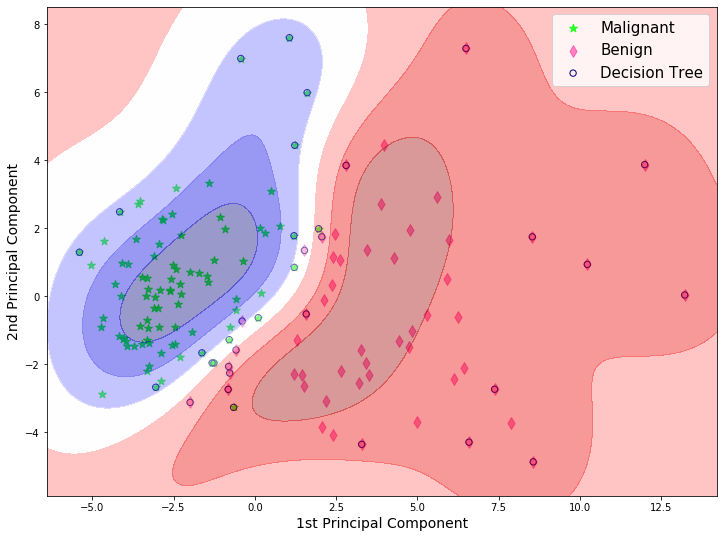

In [49]:
## Trying to plot decision boundries in better manner
from sklearn.svm import SVC 

scaler1 = StandardScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)


DecisionTree_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
#classifier_HP.fit(X_train, Y_train)
    
classify = DecisionTree_model.fit(X_test_scaled_reduced, Y_test)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = Y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(DecisionTree_model.support_vectors_[:, 0], DecisionTree_model.support_vectors_[:, 1], s=40, facecolors='none', 
           edgecolors='navy', label='Decision Tree')

plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)

#plt.savefig('ClassifyMalignant_Benign2D_Decs_FunctG10.png', dpi=300)
plt.show()